Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <<https://github.com/tinapayy/CMSC-197>>

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
# %matplotlib inline

In [297]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [298]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

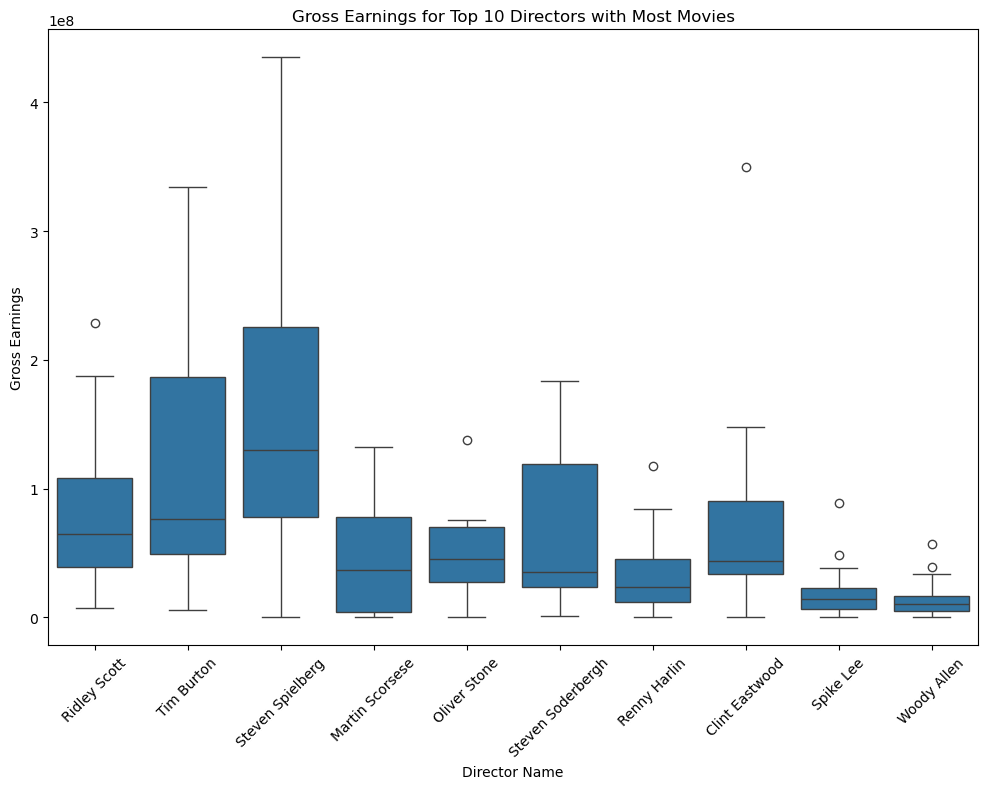

In [300]:
# Group by director_name and count movies
data_filtered = data[(data['director_name'].notna()) & (data['director_name'] != '0')]

directors_movie_count = data_filtered['director_name'].value_counts().head(10)

# Filter data frame only for the top 10 directors
top10_directors = data_filtered[data_filtered['director_name'].isin(directors_movie_count.index)]

# Create a boxplot for their gross earnings
plt.figure(figsize=(12, 8))
sns.boxplot(x='director_name', y='gross', data=top10_directors)
plt.xticks(rotation=45)
plt.title('Gross Earnings for Top 10 Directors with Most Movies')
plt.ylabel('Gross Earnings')
plt.xlabel('Director Name')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

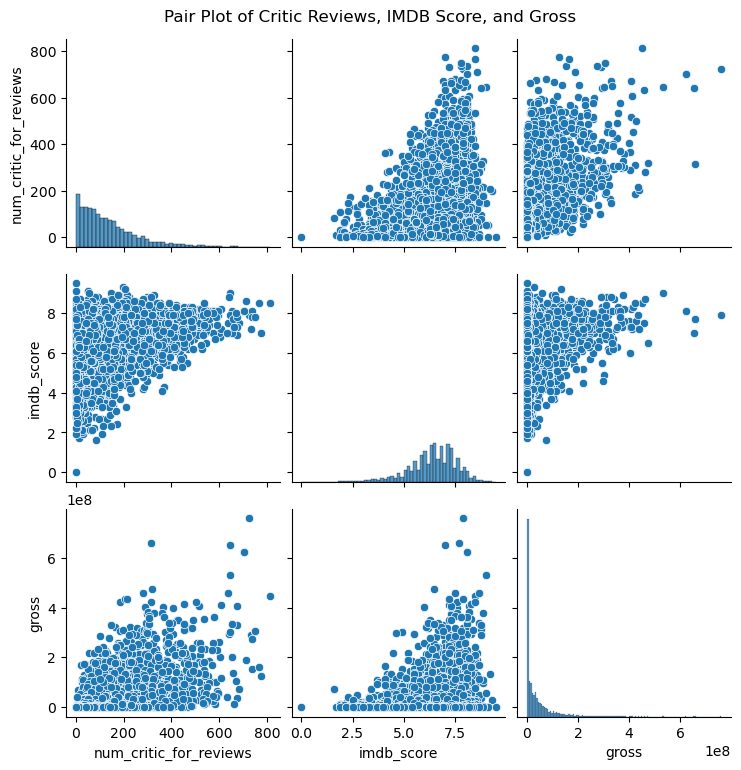

In [302]:
columns_to_plot = ['num_critic_for_reviews', 'imdb_score', 'gross']

# Create the pair plot
sns.pairplot(data[columns_to_plot])

plt.suptitle('Pair Plot of Critic Reviews, IMDB Score, and Gross', y=1.02)
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [304]:
# Compute Sales as Gross - Budget
data['sales'] = data['gross'] - data['budget']

data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Which directors garnered the most total sales?

In [306]:
# Group the data by director_name and total the Sales for each director
sales_per_director = data.groupby('director_name')['sales'].sum()

# Sort to find the directors with the highest total sales
director_sales_sorted = sales_per_director.sort_values(ascending=False)

# Display the top directors
director_sales_df = director_sales_sorted.reset_index()
director_sales_df.columns = ['Director Name', 'Total Sales']

# Display the top 10 directors by total sales
print(director_sales_df.head(10).to_string(index=False))


    Director Name  Total Sales
 Steven Spielberg 2451332231.0
     George Lucas 1386641480.0
    James Cameron 1199625910.0
      Joss Whedon 1000886628.0
   Chris Columbus  941707624.0
    Peter Jackson  900969279.0
       Tim Burton  824275480.0
Christopher Nolan  808227576.0
      Jon Favreau  769381547.0
 Francis Lawrence  755501971.0


## Plot sales and average likes as a scatterplot. Fit it with a line.

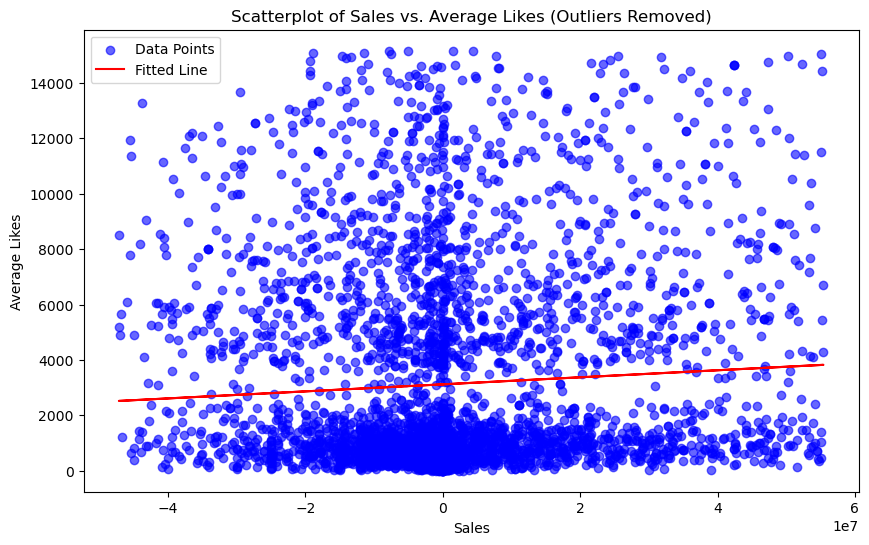

In [308]:
# Calculate the average likes
data['average_likes'] = data[['director_facebook_likes',  
                              'cast_total_facebook_likes', 
                              'movie_facebook_likes']].mean(axis=1)

# Define a function to remove outliers based on IQR (stat yey)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'sales' and 'average_likes'
data_filtered = remove_outliers(data, 'sales')
data_filtered = remove_outliers(data_filtered, 'average_likes')

# Create the scatterplot w/out outliers
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['sales'], data_filtered['average_likes'], color='blue', label='Data Points', alpha=0.6)

# Fit a line to the data
m, b = np.polyfit(data_filtered['sales'], data_filtered['average_likes'], 1)
plt.plot(data_filtered['sales'], m * data_filtered['sales'] + b, color='red', label='Fitted Line')

plt.xlabel('Sales')
plt.ylabel('Average Likes')
plt.title('Scatterplot of Sales vs. Average Likes (Outliers Removed)')

plt.legend()
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

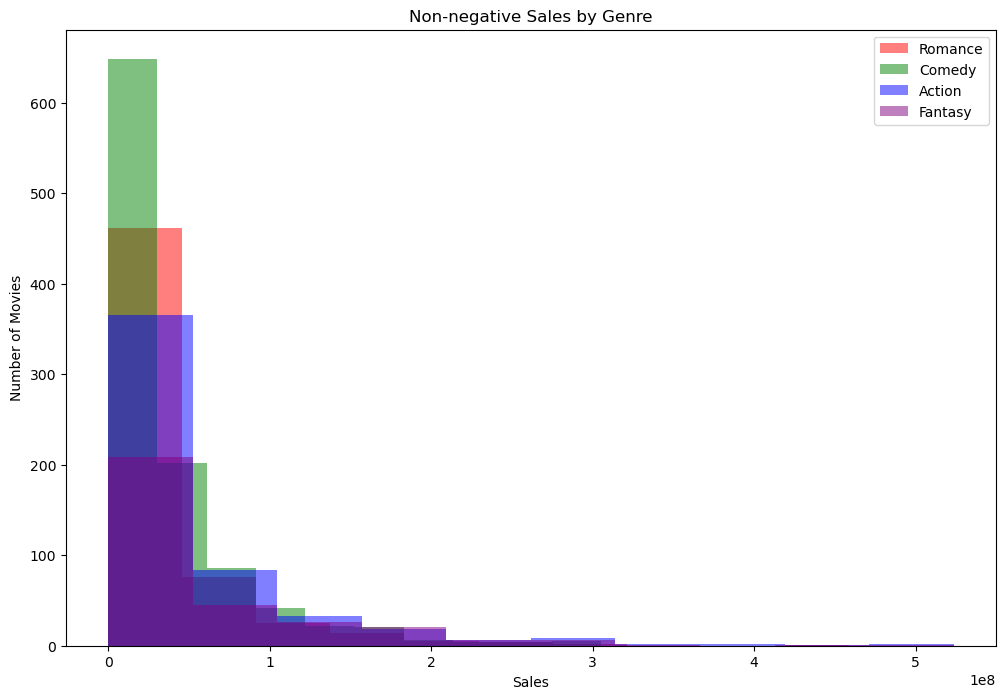

In [310]:
genres = ['Romance', 'Comedy', 'Action', 'Fantasy']
colors = ['red', 'green', 'blue', 'purple']

plt.figure(figsize=(12, 8))

# Loop through the genres, removed negative sales for relevance of most profitable
for genre, color in zip(genres, colors):
    genre_sales = data[(data['genres'].str.contains(genre, na=False)) & (data['sales'] >= 0)]['sales']
    plt.hist(genre_sales, bins=10, color=color, alpha=0.5, label=genre)

plt.xlabel('Sales')
plt.ylabel('Number of Movies')
plt.title('Non-negative Sales by Genre')
plt.legend()

plt.show()


## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [312]:
# Calculate the average likes of the three actors
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1).round(2)

# Display the first few rows to check the new column
data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,12611.333333,930.33
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,16304.333333,15333.33
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,32233.333333,3851.33
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,97586.333333,24333.33
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,91.333333,47.67


## Copying the whole dataframe

In [314]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,12611.333333,930.33
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,16304.333333,15333.33
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,32233.333333,3851.33
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,97586.333333,24333.33
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,91.333333,47.67


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [317]:
# Identify numeric columns (integer or float)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Normalize each numeric column by scaling between 0 and 1
df[numeric_cols] = df[numeric_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.057585,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.074447,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.147181,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.445590,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000417,0.000218
